In [189]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import time
import folium
import os
import sys
import abstract_flows.arrow as arrow
import abstract_flows.grid as grid
import abstract_flows.flows as flows
from load_data import load_data

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")

Datos sintéticos

In [2]:
bf =[]

for i in range(1, 4):
    f = np.load(f'synthetic_data/f{i}.npy')
    bf.append(f)

In [3]:
for f in bf:
    print('Flow')
    print(f)

Flow
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
Flow
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
Flow
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


In [4]:
laplacian = np.load('synthetic_data/laplacian.npy')
print('Laplacian')
print(laplacian)

Laplacian
[[ 1.         -0.5         0.         -0.40824829]
 [-0.5         1.          0.         -0.40824829]
 [ 0.          0.          1.         -0.57735027]
 [-0.40824829 -0.40824829 -0.57735027  1.        ]]


In [21]:
fs = np.load('synthetic_data/flows.npy')
print('Flows')
print(fs[0:2])
print('Cantidad de flujos', fs.shape[0])

Flows
[[[1.  0.  0.  0. ]
  [0.  1.  0.  0. ]
  [0.  0.  0.  1. ]
  [0.  0.  1.  0. ]]

 [[0.9 0.  0.  0. ]
  [0.1 1.  0.  0. ]
  [0.  0.  0.  1. ]
  [0.  0.  1.  0. ]]]
Cantidad de flujos 30


Resultados

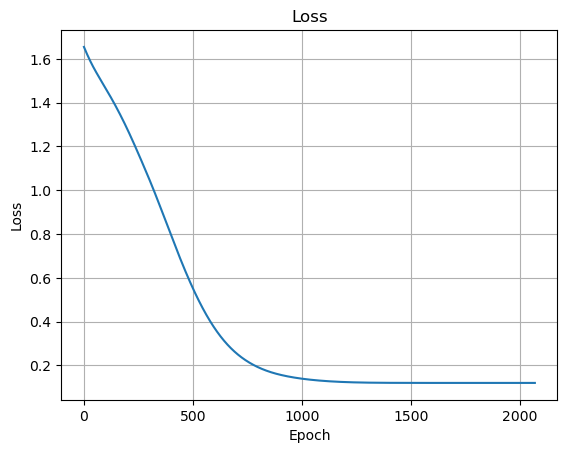

In [41]:
loss = np.load('results_little_experiment/loss.npy')
plt.plot(loss)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

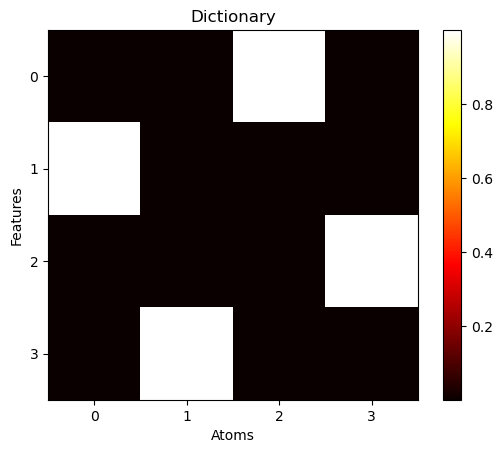

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


array([1., 1., 1., 1.], dtype=float32)

In [42]:
D = np.load('results_little_experiment/dictionary.npy')
plt.imshow(D, cmap='hot', interpolation='nearest')
plt.title('Dictionary')
plt.xlabel('Atoms')
plt.ylabel('Features')
plt.xticks(np.arange(0, D.shape[1], 1))
plt.yticks(np.arange(0, D.shape[0], 1))
plt.colorbar()
plt.show()
print(D)
D.sum(axis=0)

In [43]:
weights = np.load('results_little_experiment/weights.npy')
print(weights[1])
weights[1].sum(axis=1)

[[0.0998 0.9998 0.     0.0001]
 [0.0001 0.0001 0.9999 0.0001]
 [0.8998 0.0001 0.0001 0.0001]
 [0.0003 0.0001 0.     0.9997]]


array([1.0997, 1.0001, 0.9   , 1.0002], dtype=float32)

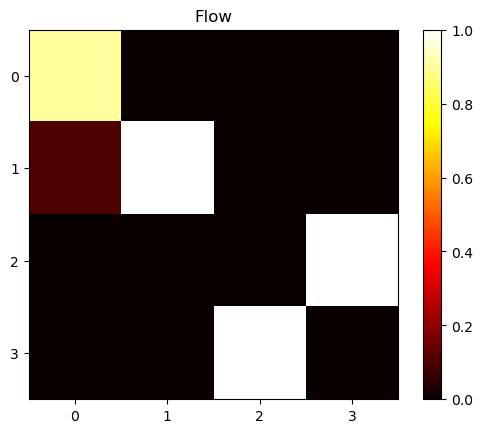

[[0.9 0.  0.  0. ]
 [0.1 1.  0.  0. ]
 [0.  0.  0.  1. ]
 [0.  0.  1.  0. ]]


In [44]:
plt.imshow(fs[1], cmap='hot', interpolation='nearest')
plt.title('Flow')
plt.xticks(np.arange(0, fs[1].shape[1], 1))
plt.yticks(np.arange(0, fs[1].shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(fs[1])

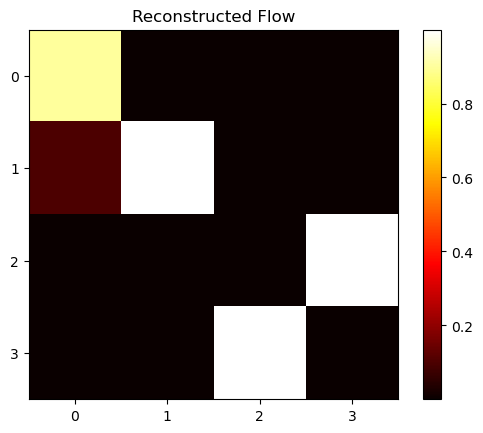

[[0.8998 0.0001 0.0001 0.0001]
 [0.0998 0.9998 0.     0.0001]
 [0.0003 0.0001 0.     0.9997]
 [0.0001 0.0001 0.9998 0.0001]]


In [45]:
fs_reconstructed = D@weights[1]
plt.imshow(fs_reconstructed, cmap='hot', interpolation='nearest')
plt.title('Reconstructed Flow')
plt.xticks(np.arange(0, fs_reconstructed.shape[1], 1))
plt.yticks(np.arange(0, fs_reconstructed.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(fs_reconstructed)

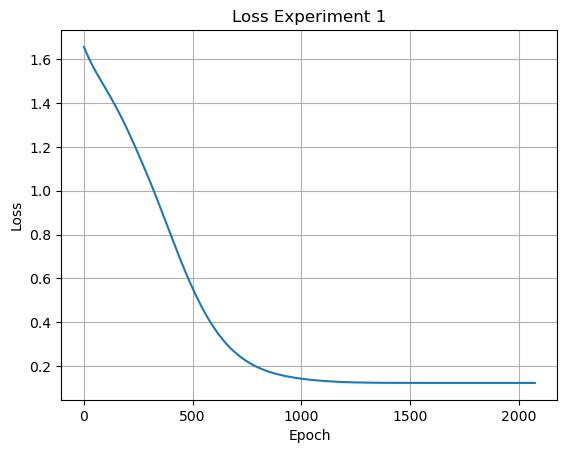

In [46]:
loss_1 = np.load('results_little_experiment_1/loss.npy')
plt.plot(loss_1)
plt.title('Loss Experiment 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

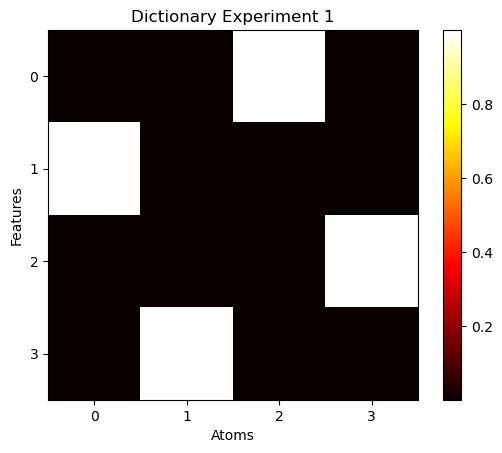

[[0.     0.     0.9995 0.0004]
 [0.9998 0.0001 0.0001 0.    ]
 [0.0002 0.     0.0002 0.9995]
 [0.     0.9999 0.0002 0.0001]]


array([1., 1., 1., 1.], dtype=float32)

In [47]:
D_1 = np.load('results_little_experiment_1/dictionary.npy')
plt.imshow(D_1, cmap='hot', interpolation='nearest')
plt.title('Dictionary Experiment 1')
plt.xlabel('Atoms')
plt.ylabel('Features')
plt.xticks(np.arange(0, D_1.shape[1], 1))
plt.yticks(np.arange(0, D_1.shape[0], 1))
plt.colorbar()
plt.show()
print(D_1)
D_1.sum(axis=0)

[[0.0996 0.9998 0.     0.0001]
 [0.0001 0.0001 0.9999 0.    ]
 [0.9001 0.0001 0.0001 0.0001]
 [0.0003 0.0001 0.     0.9998]]


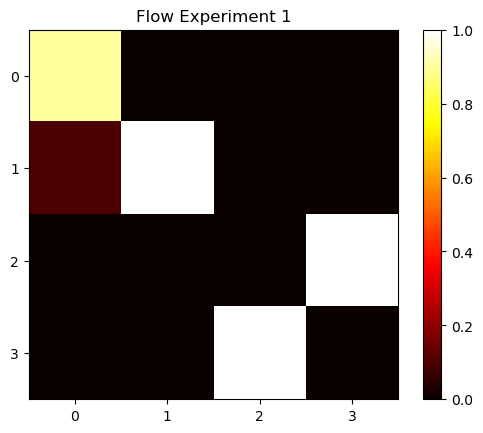

In [48]:
weights_1 = np.load('results_little_experiment_1/weights.npy')
print(weights_1[1])
weights_1[1].sum(axis=1)
plt.imshow(fs[1], cmap='hot', interpolation='nearest')
plt.title('Flow Experiment 1')
plt.xticks(np.arange(0, fs[1].shape[1], 1))
plt.yticks(np.arange(0, fs[1].shape[0], 1))
plt.colorbar()
plt.show()

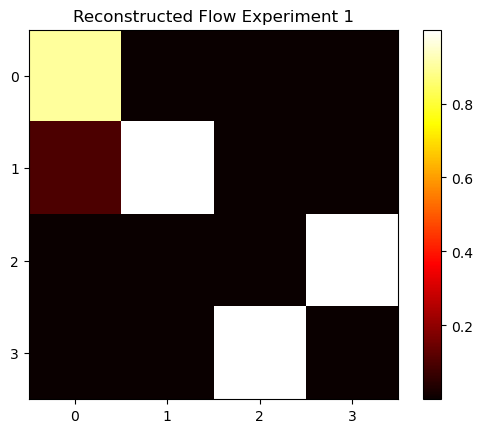

[[0.8996 0.0001 0.0001 0.0004]
 [0.0996 0.9996 0.0001 0.0001]
 [0.0004 0.0002 0.     0.9993]
 [0.0003 0.0001 0.9997 0.0001]]


In [49]:
fs_reconstructed_1 = D_1@weights_1[1]
plt.imshow(fs_reconstructed_1, cmap='hot', interpolation='nearest')
plt.title('Reconstructed Flow Experiment 1')
plt.xticks(np.arange(0, fs_reconstructed_1.shape[1], 1))
plt.yticks(np.arange(0, fs_reconstructed_1.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(fs_reconstructed_1)

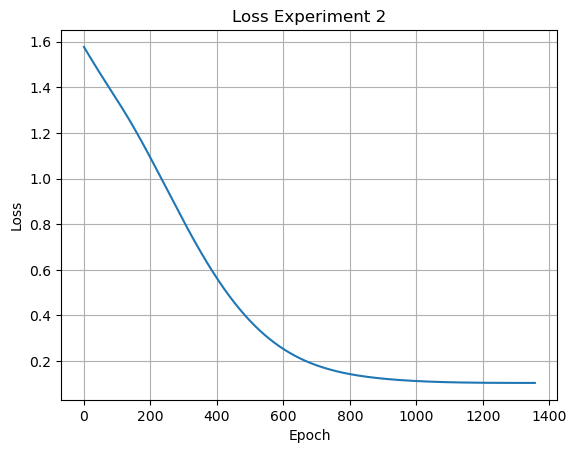

In [50]:
loss_2 = np.load('results_little_experiment_2/loss.npy')
plt.plot(loss_2)
plt.title('Loss Experiment 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

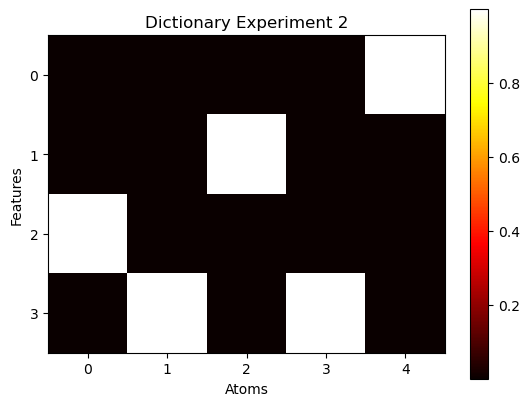

[[0.0001 0.0001 0.0001 0.0001 0.9991]
 [0.0001 0.0002 0.9995 0.0001 0.0003]
 [0.9997 0.0002 0.0002 0.0003 0.0004]
 [0.0001 0.9995 0.0002 0.9995 0.0002]]


In [51]:
D_2 = np.load('results_little_experiment_2/dictionary.npy')
plt.imshow(D_2, cmap='hot', interpolation='nearest')
plt.title('Dictionary Experiment 2')
plt.xlabel('Atoms')
plt.ylabel('Features')
plt.xticks(np.arange(0, D_2.shape[1], 1))
plt.yticks(np.arange(0, D_2.shape[0], 1))
plt.colorbar()
plt.show()
print(D_2)

[[0.0072 0.0002 0.0002 0.9928]
 [0.0029 0.0001 0.4995 0.0003]
 [0.0928 0.9919 0.0003 0.0003]
 [0.0031 0.0033 0.4986 0.0008]
 [0.8939 0.0045 0.0014 0.0058]]


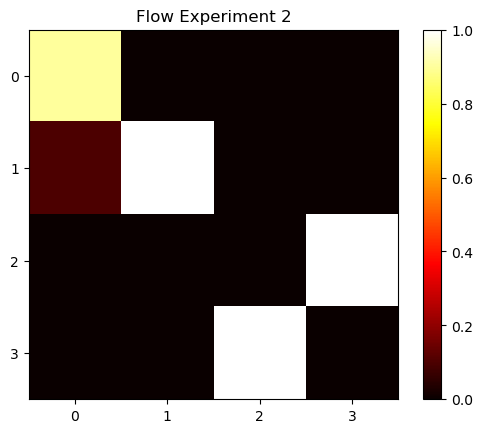

In [52]:
weights_2 = np.load('results_little_experiment_2/weights.npy')
print(weights_2[1])
weights_2[1].sum(axis=1)
plt.imshow(fs[1], cmap='hot', interpolation='nearest')
plt.title('Flow Experiment 2')
plt.xticks(np.arange(0, fs[1].shape[1], 1))
plt.yticks(np.arange(0, fs[1].shape[0], 1))
plt.colorbar()
plt.show()

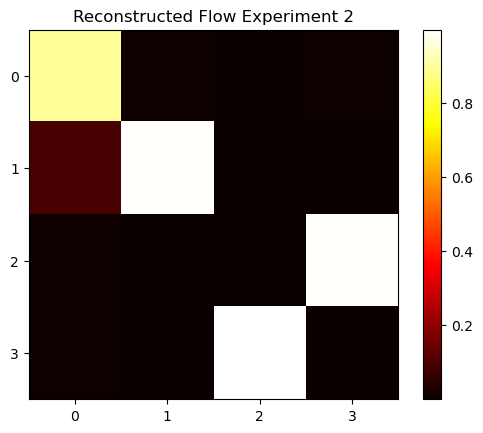

[[0.8931 0.0046 0.0016 0.0059]
 [0.093  0.9914 0.0004 0.0004]
 [0.0076 0.0004 0.0004 0.9925]
 [0.0062 0.0036 0.9976 0.0012]]


In [53]:
fs_reconstructed_2 = D_2@weights_2[1]
plt.imshow(fs_reconstructed_2, cmap='hot', interpolation='nearest')
plt.title('Reconstructed Flow Experiment 2')
plt.xticks(np.arange(0, fs_reconstructed_2.shape[1], 1))
plt.yticks(np.arange(0, fs_reconstructed_2.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(fs_reconstructed_2)

Datos sintéticos (más pesados)

In [2]:
bf = []

for i in range(1, 5):
    f = np.load(f'synthetic_data2/f{i}.npy')
    bf.append(f)

In [3]:
for i in range(len(bf)):
    print(f'Flow {i+1}')
    print(bf[i])

Flow 1
[[0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0.  1.  0.  0.1]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.1 0. ]
 [0.  0.  0.2 0.2 0.  0.  0.2 0.  0.  0.2]
 [0.  0.2 0.5 0.5 0.  0.  0.5 0.  0.3 0.3]
 [0.  0.  0.2 0.2 0.3 0.  0.2 0.  0.1 0.2]
 [0.  0.1 0.1 0.1 0.1 1.  0.1 0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.  0.  0.3 0.2]
 [0.  0.2 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.  0.  0.  0.2 0. ]]
Flow 2
[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.3 0.5 0.  0.  0.  0.3]
 [0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.1]
 [0.  0.  1.  1.  0.4 0.  0.  0.  1.  0.4]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.3 0.  0.  0.  0.  0.  0.3 0.3 0.  0. ]
 [0.1 0.  0.  0.  0.2 0.  0.1 0.1 0.  0.2]
 [0.5 0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.5 0.  0.  0.  0.5 0.  0.  0.  0. ]
 [0.1 0.  0.  0.  0.  0.  0.1 0.1 0.  0. ]]
Flow 3
[[0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.5]
 [1.  0.  0.  0.  0.1 0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0

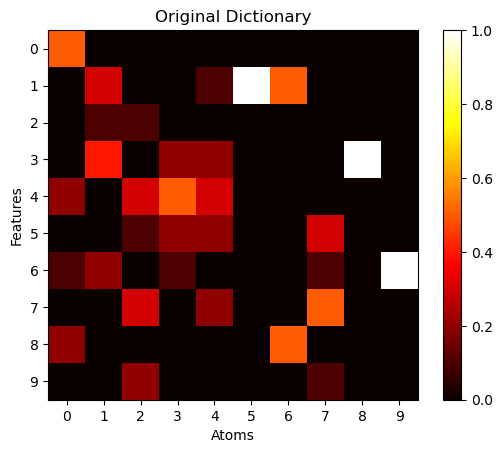

In [4]:
original_dictionary = np.load('synthetic_data2/dictionary.npy')
plt.imshow(original_dictionary, cmap='hot', interpolation='nearest')
plt.title('Original Dictionary')
plt.xlabel('Atoms')
plt.ylabel('Features')
plt.xticks(np.arange(0, original_dictionary.shape[1], 1))
plt.yticks(np.arange(0, original_dictionary.shape[0], 1))
plt.colorbar()
plt.show()

In [8]:
original_flows = np.load('synthetic_data2/flows.npy')
original_flows.shape

(120, 10, 10)

Con 9 átomos:

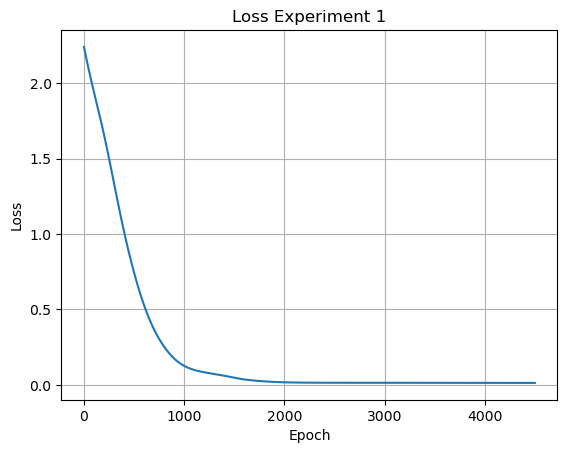

In [5]:
loss_1 = np.load('results_middle_experiment_1/loss.npy')
plt.plot(loss_1)
plt.title('Loss Experiment 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [11]:
learned_dictionary_1 = np.load('results_middle_experiment_1/dictionary.npy')
learned_weights_1 = np.load('results_middle_experiment_1/weights.npy')

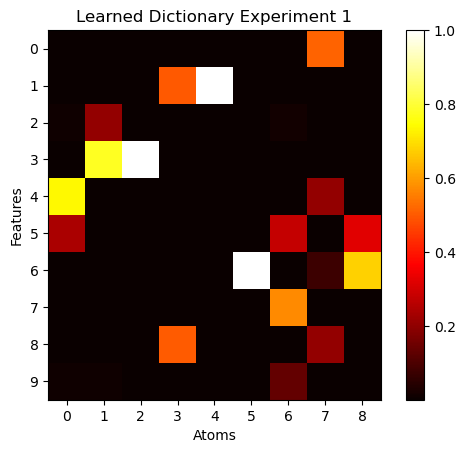

In [12]:
plt.imshow(learned_dictionary_1, cmap='hot', interpolation='nearest')
plt.title('Learned Dictionary Experiment 1')
plt.xlabel('Atoms')
plt.ylabel('Features')
plt.xticks(np.arange(0, learned_dictionary_1.shape[1], 1))
plt.yticks(np.arange(0, learned_dictionary_1.shape[0], 1))
plt.colorbar()
plt.show()

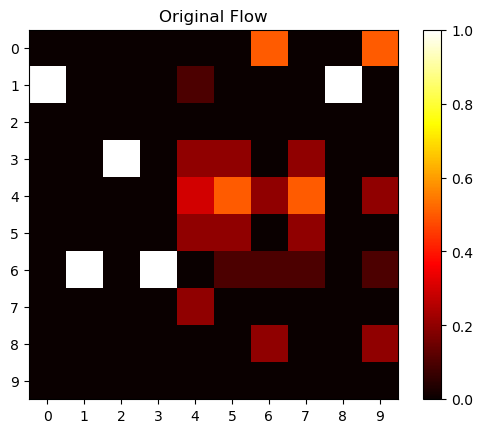

[[0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.5]
 [1.  0.  0.  0.  0.1 0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.2 0.2 0.  0.2 0.  0. ]
 [0.  0.  0.  0.  0.3 0.5 0.2 0.5 0.  0.2]
 [0.  0.  0.  0.  0.2 0.2 0.  0.2 0.  0. ]
 [0.  1.  0.  1.  0.  0.1 0.1 0.1 0.  0.1]
 [0.  0.  0.  0.  0.2 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.2]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


In [15]:
flow_0 = original_flows[0]
plt.imshow(flow_0, cmap='hot', interpolation='nearest')
plt.title('Original Flow')
plt.xticks(np.arange(0, flow_0.shape[1], 1))
plt.yticks(np.arange(0, flow_0.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(flow_0)

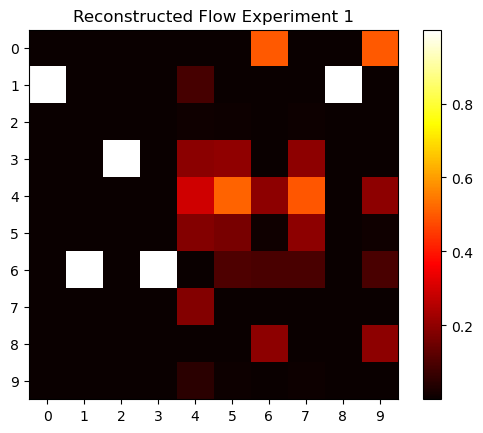

[[0.     0.     0.     0.     0.     0.     0.4962 0.     0.     0.4964]
 [0.9998 0.     0.     0.     0.092  0.     0.     0.0001 0.9998 0.    ]
 [0.     0.     0.0002 0.     0.0086 0.0071 0.0007 0.0068 0.     0.0007]
 [0.     0.     0.9998 0.     0.192  0.2015 0.     0.196  0.     0.    ]
 [0.     0.     0.     0.     0.2938 0.5124 0.1976 0.4947 0.     0.1977]
 [0.     0.0031 0.     0.003  0.1835 0.167  0.0098 0.1989 0.     0.0101]
 [0.     0.9969 0.     0.9969 0.     0.1016 0.097  0.0946 0.0001 0.0964]
 [0.     0.     0.     0.     0.1826 0.0026 0.     0.0016 0.     0.    ]
 [0.0001 0.     0.     0.     0.     0.     0.1967 0.0001 0.     0.1968]
 [0.     0.     0.     0.     0.0473 0.0077 0.0019 0.0073 0.     0.0019]]


In [19]:
reconstructed_flow_0_1 = learned_dictionary_1 @ learned_weights_1[0]
plt.imshow(reconstructed_flow_0_1, cmap='hot', interpolation='nearest')
plt.title('Reconstructed Flow Experiment 1')
plt.xticks(np.arange(0, reconstructed_flow_0_1.shape[1], 1))
plt.yticks(np.arange(0, reconstructed_flow_0_1.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(reconstructed_flow_0_1)

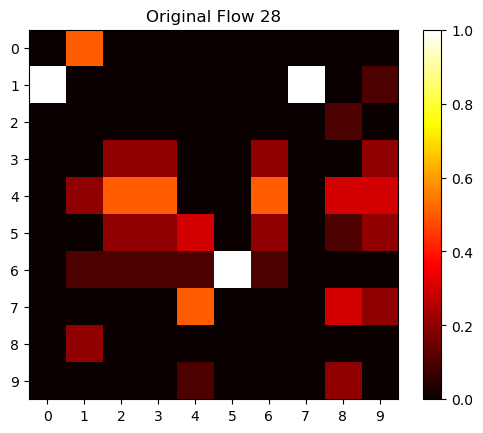

[[0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0.  1.  0.  0.1]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.1 0. ]
 [0.  0.  0.2 0.2 0.  0.  0.2 0.  0.  0.2]
 [0.  0.2 0.5 0.5 0.  0.  0.5 0.  0.3 0.3]
 [0.  0.  0.2 0.2 0.3 0.  0.2 0.  0.1 0.2]
 [0.  0.1 0.1 0.1 0.1 1.  0.1 0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.  0.  0.3 0.2]
 [0.  0.2 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.  0.  0.  0.2 0. ]]


In [28]:
flow_54 = original_flows[28]
plt.imshow(flow_54, cmap='hot', interpolation='nearest')
plt.title('Original Flow 28')
plt.xticks(np.arange(0, flow_54.shape[1], 1))
plt.yticks(np.arange(0, flow_54.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(flow_54)

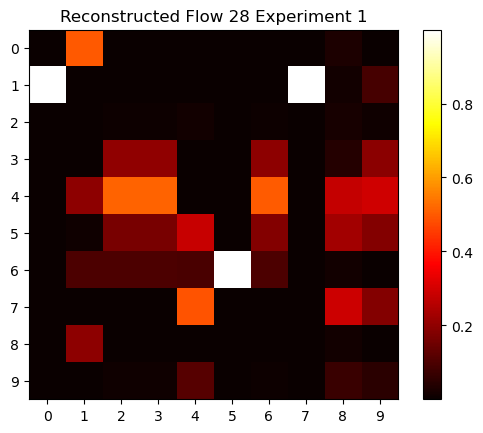

[[0.     0.4961 0.     0.     0.     0.     0.0001 0.     0.028  0.    ]
 [0.9998 0.     0.0001 0.     0.     0.     0.0001 0.9998 0.0131 0.092 ]
 [0.     0.0007 0.0071 0.0071 0.0125 0.     0.0069 0.     0.0215 0.0086]
 [0.     0.     0.2011 0.2013 0.     0.     0.1973 0.0001 0.0392 0.192 ]
 [0.     0.1976 0.5118 0.5122 0.0014 0.     0.5017 0.     0.2791 0.2938]
 [0.     0.0086 0.1675 0.1671 0.2841 0.0029 0.1829 0.     0.2286 0.1835]
 [0.     0.0984 0.1013 0.1014 0.096  0.997  0.1    0.     0.0128 0.    ]
 [0.     0.     0.0032 0.0029 0.49   0.     0.0031 0.     0.2924 0.1826]
 [0.     0.1967 0.     0.     0.     0.     0.0001 0.     0.0119 0.    ]
 [0.     0.0019 0.0079 0.0078 0.116  0.     0.0077 0.     0.0735 0.0473]]


In [29]:
recconstructed_flow_28_1 = learned_dictionary_1 @ learned_weights_1[28]
plt.imshow(recconstructed_flow_28_1, cmap='hot', interpolation='nearest')
plt.title('Reconstructed Flow 28 Experiment 1')
plt.xticks(np.arange(0, recconstructed_flow_28_1.shape[1], 1))
plt.yticks(np.arange(0, recconstructed_flow_28_1.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(recconstructed_flow_28_1)

Experimento 2 con 10 átomos

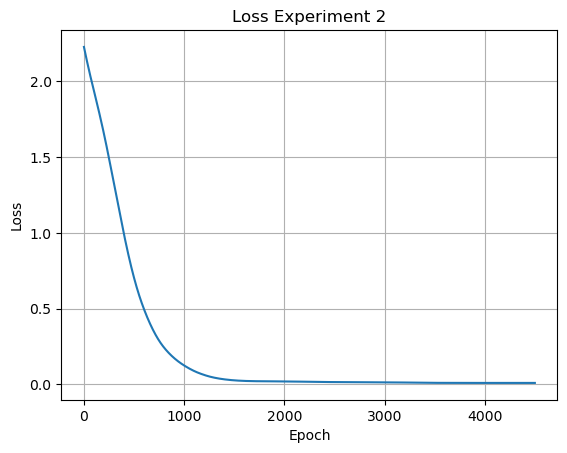

In [16]:
loss_2 = np.load('results_middle_experiment_2/loss.npy')
plt.plot(loss_2)
plt.title('Loss Experiment 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [17]:
learned_dictionary_2 = np.load('results_middle_experiment_2/dictionary.npy')
learned_weights_2 = np.load('results_middle_experiment_2/weights.npy')

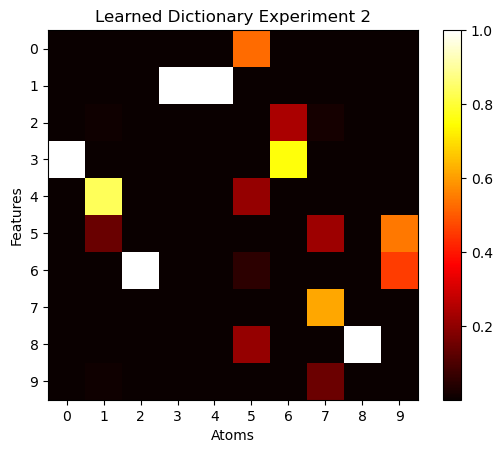

In [18]:
plt.imshow(learned_dictionary_2, cmap='hot', interpolation='nearest')
plt.title('Learned Dictionary Experiment 2')
plt.xlabel('Atoms')
plt.ylabel('Features')
plt.xticks(np.arange(0, learned_dictionary_2.shape[1], 1))
plt.yticks(np.arange(0, learned_dictionary_2.shape[0], 1))
plt.colorbar()
plt.show()

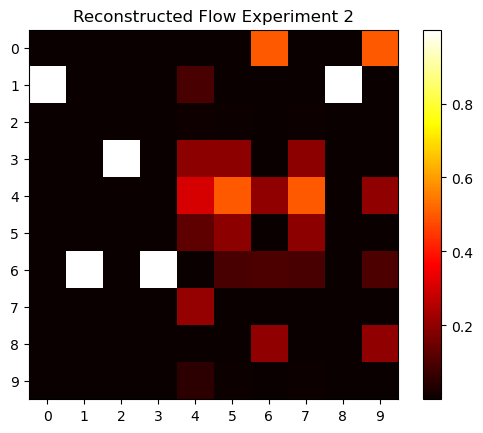

[[0.     0.     0.     0.     0.     0.     0.4994 0.     0.     0.4994]
 [0.9998 0.     0.     0.     0.0967 0.     0.0001 0.     0.9999 0.0001]
 [0.     0.     0.0001 0.     0.0096 0.0068 0.0008 0.0068 0.     0.0008]
 [0.     0.     0.9976 0.     0.1969 0.1969 0.     0.1969 0.     0.    ]
 [0.     0.     0.     0.     0.3077 0.4963 0.1995 0.4963 0.     0.1995]
 [0.     0.0002 0.0022 0.0002 0.128  0.199  0.0001 0.1989 0.     0.0001]
 [0.     0.9998 0.     0.9998 0.     0.0944 0.0994 0.0945 0.     0.0994]
 [0.     0.     0.     0.     0.2073 0.0001 0.     0.0001 0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.1994 0.     0.     0.1994]
 [0.     0.     0.     0.     0.0538 0.0065 0.0014 0.0065 0.     0.0014]]


In [20]:
reconstructed_flow_0_2 = learned_dictionary_2 @ learned_weights_2[0]
plt.imshow(reconstructed_flow_0_2, cmap='hot', interpolation='nearest')
plt.title('Reconstructed Flow Experiment 2')
plt.xticks(np.arange(0, reconstructed_flow_0_2.shape[1], 1))
plt.yticks(np.arange(0, reconstructed_flow_0_2.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(reconstructed_flow_0_2)

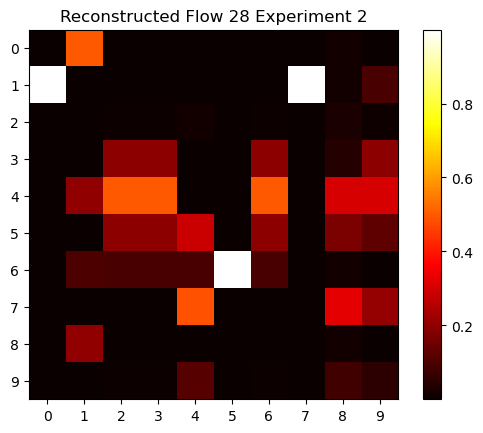

[[0.     0.4994 0.     0.     0.     0.     0.     0.     0.0156 0.    ]
 [0.9999 0.0001 0.     0.     0.     0.     0.     0.9999 0.0123 0.0967]
 [0.     0.0008 0.0068 0.0068 0.0128 0.     0.0068 0.     0.0254 0.0096]
 [0.     0.     0.1969 0.1969 0.     0.     0.1969 0.     0.04   0.1968]
 [0.     0.1995 0.4963 0.4963 0.0001 0.     0.4963 0.     0.3055 0.3077]
 [0.     0.0001 0.1985 0.1989 0.2883 0.0002 0.1989 0.     0.1685 0.128 ]
 [0.     0.0994 0.0949 0.0945 0.0957 0.9998 0.0945 0.     0.0123 0.0001]
 [0.     0.     0.0001 0.0001 0.4863 0.     0.     0.     0.3258 0.2072]
 [0.     0.1994 0.     0.     0.     0.     0.     0.     0.0123 0.    ]
 [0.     0.0014 0.0065 0.0065 0.1169 0.     0.0065 0.     0.0822 0.0538]]


In [30]:
reconstructed_flow_28_2 = learned_dictionary_2 @ learned_weights_2[28]
plt.imshow(reconstructed_flow_28_2, cmap='hot', interpolation='nearest')
plt.title('Reconstructed Flow 28 Experiment 2')
plt.xticks(np.arange(0, reconstructed_flow_28_2.shape[1], 1))
plt.yticks(np.arange(0, reconstructed_flow_28_2.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(reconstructed_flow_28_2)

Prueba 3 con 11 átomos

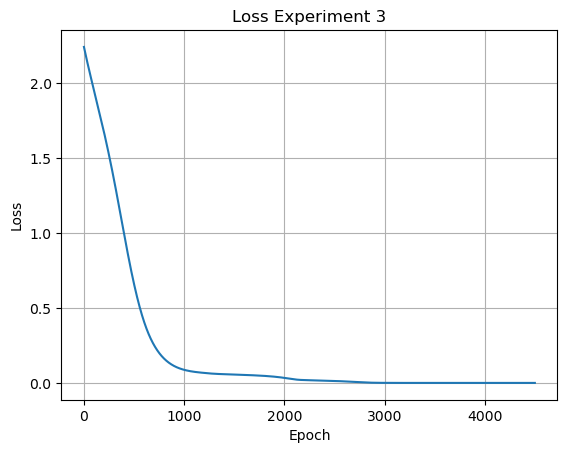

In [33]:
loss_3 = np.load('results_middle_experiment_3/loss.npy')
plt.plot(loss_3)
plt.title('Loss Experiment 3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [34]:
learned_dictionary_3 = np.load('results_middle_experiment_3/dictionary.npy')
learned_weights_3 = np.load('results_middle_experiment_3/weights.npy')

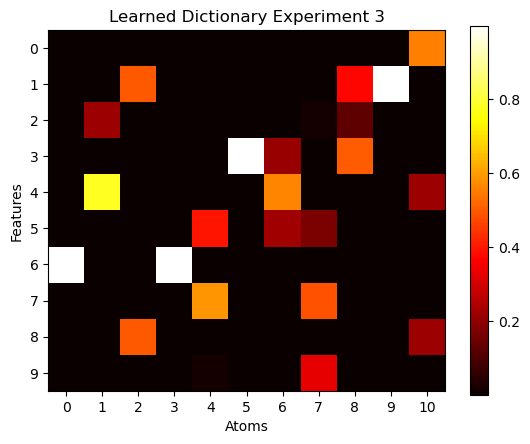

In [35]:
plt.imshow(learned_dictionary_3, cmap='hot', interpolation='nearest')
plt.title('Learned Dictionary Experiment 3')
plt.xlabel('Atoms')
plt.ylabel('Features')
plt.xticks(np.arange(0, learned_dictionary_3.shape[1], 1))
plt.yticks(np.arange(0, learned_dictionary_3.shape[0], 1))
plt.colorbar()
plt.show()

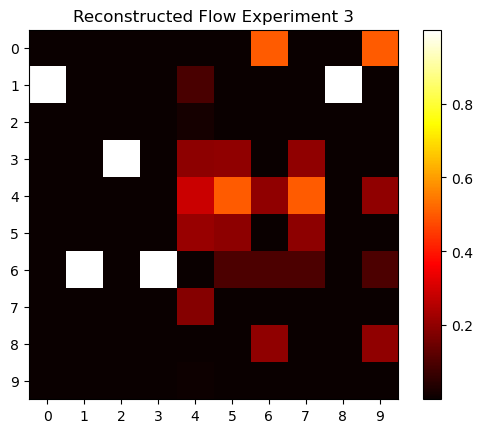

[[0.     0.     0.     0.     0.     0.     0.5    0.     0.     0.5   ]
 [0.9998 0.0001 0.0002 0.0001 0.0955 0.0002 0.     0.0002 0.9998 0.    ]
 [0.     0.     0.0001 0.     0.0188 0.0001 0.0003 0.0001 0.     0.0003]
 [0.     0.     0.9998 0.     0.1955 0.1999 0.     0.2    0.     0.    ]
 [0.     0.     0.     0.     0.289  0.5006 0.1999 0.5007 0.     0.1999]
 [0.     0.     0.     0.     0.2121 0.1983 0.     0.1983 0.     0.    ]
 [0.     0.9997 0.     0.9997 0.     0.0999 0.0999 0.1    0.     0.0999]
 [0.     0.     0.     0.     0.1841 0.0007 0.     0.0006 0.     0.    ]
 [0.0001 0.     0.     0.     0.     0.     0.1999 0.     0.0001 0.1999]
 [0.     0.     0.     0.     0.005  0.     0.     0.     0.     0.    ]]


In [36]:
recostructed_flow_0_3 = learned_dictionary_3 @ learned_weights_3[0]
plt.imshow(recostructed_flow_0_3, cmap='hot', interpolation='nearest')
plt.title('Reconstructed Flow Experiment 3')
plt.xticks(np.arange(0, recostructed_flow_0_3.shape[1], 1))
plt.yticks(np.arange(0, recostructed_flow_0_3.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(recostructed_flow_0_3)

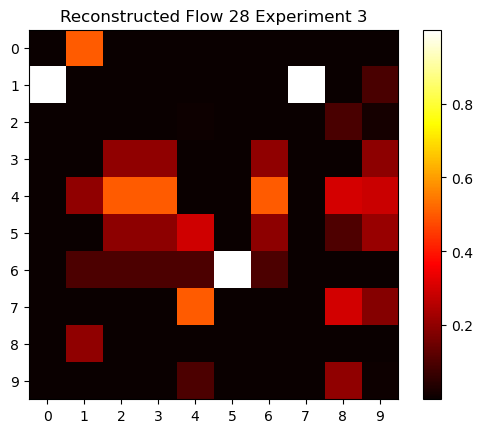

[[0.     0.4999 0.     0.     0.     0.     0.     0.     0.0001 0.    ]
 [0.9998 0.     0.0002 0.0002 0.0001 0.0001 0.0002 0.9998 0.0004 0.0955]
 [0.     0.0003 0.0001 0.0001 0.0042 0.     0.0001 0.     0.0948 0.0188]
 [0.     0.     0.2    0.2    0.0001 0.     0.2    0.     0.0004 0.1955]
 [0.     0.1999 0.5007 0.5007 0.0003 0.     0.5007 0.     0.3013 0.289 ]
 [0.     0.     0.1983 0.1983 0.2963 0.     0.1983 0.     0.1034 0.2121]
 [0.     0.0999 0.1    0.1    0.0996 0.9997 0.1    0.     0.0002 0.    ]
 [0.     0.     0.0007 0.0006 0.5018 0.     0.0007 0.     0.2974 0.1841]
 [0.0001 0.1999 0.     0.     0.     0.     0.     0.0001 0.0001 0.    ]
 [0.     0.     0.     0.     0.0977 0.     0.     0.     0.2019 0.005 ]]


In [37]:
reconstructed_flow_28_3 = learned_dictionary_3 @ learned_weights_3[28]
plt.imshow(reconstructed_flow_28_3, cmap='hot', interpolation='nearest')
plt.title('Reconstructed Flow 28 Experiment 3')
plt.xticks(np.arange(0, reconstructed_flow_28_3.shape[1], 1))
plt.yticks(np.arange(0, reconstructed_flow_28_3.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(reconstructed_flow_28_3)

In [67]:
data_2018_completa = load_data('mibici/mibici_2018.csv', False)
est_2018 = load_data('mibici/est_2018.npy', False)
data_2018_completa.head()

,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Tiempo_de_viaje,Inicio,Fin
0,4783525,251562,M,1982.0,2018-01-01 06:01:03,2018-01-01 06:10:11,59,28,548.0,2018-01-01 06:01:03,2018-01-01 06:10:11
1,4783526,260233,M,2000.0,2018-01-01 06:03:15,2018-01-01 06:06:42,250,164,207.0,2018-01-01 06:03:15,2018-01-01 06:06:42
2,4783527,277431,M,1993.0,2018-01-01 06:09:56,2018-01-01 06:15:17,148,238,321.0,2018-01-01 06:09:56,2018-01-01 06:15:17
3,4783528,157371,M,1991.0,2018-01-01 06:16:50,2018-01-01 06:26:45,202,51,595.0,2018-01-01 06:16:50,2018-01-01 06:26:45
4,4783529,237066,M,1995.0,2018-01-01 06:19:44,2018-01-01 06:24:59,11,173,315.0,2018-01-01 06:19:44,2018-01-01 06:24:59


In [116]:
data_2018 = data_2018_completa[data_2018_completa['Inicio'].str.contains('2018-11-15')]
data_2018.tail()

,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Tiempo_de_viaje,Inicio,Fin
2955092,8374584,51316,F,1990.0,2018-11-15 23:58:49,2018-11-16 00:04:05,64,85,316.0,2018-11-15 23:58:49,2018-11-16 00:04:05
2955093,8374585,251364,M,1999.0,2018-11-15 23:59:10,2018-11-16 00:08:18,79,177,548.0,2018-11-15 23:59:10,2018-11-16 00:08:18
2955094,8374586,63135,M,1986.0,2018-11-15 23:59:43,2018-11-16 00:14:48,200,60,905.0,2018-11-15 23:59:43,2018-11-16 00:14:48
2971805,8394586,351646,M,1995.0,2018-11-15 17:52:46,2018-11-15 18:20:39,289,178,1673.0,2018-11-15 17:52:46,2018-11-15 18:20:39
2971806,8394587,361235,M,1979.0,2018-11-15 18:21:59,2018-11-15 18:22:01,289,107,2.0,2018-11-15 18:21:59,2018-11-15 18:22:01


In [117]:
counter = flows.count_trips_mibici(data_2018, threshold=0, directed=True)
counter.head()

,Est_A,Est_B,counts,prob
0,194,51,35,0.002918
1,65,51,26,0.002168
2,66,51,21,0.001751
3,51,65,19,0.001584
4,75,75,19,0.001584


In [118]:
stations = pd.unique(np.concatenate((counter['Est_A'].unique(), counter['Est_B'].unique())))

In [119]:
c_grid = grid.Grid(4, 4, 'mibici')

In [120]:
map_ = c_grid.map_around()

In [121]:
station_cells = flows.stations_and_cells(c_grid.geodataframe(), stations, est_2018)

In [122]:
graph_df = flows.abstract_flows(counter, c_grid.geodataframe(), station_cells, est_2018, threshold=2)
graph_df

,i_A,j_A,i_B,j_B,flow_count,mass_center_A,mass_center_B
0,1,1,1,2,1694.0,"(20.674735502622962, -103.37352828435174)","(20.67582101188127, -103.35217925452555)"
1,1,1,1,1,1923.0,"(20.674735502622962, -103.37352828435174)","(20.674735502622962, -103.37352828435174)"
2,1,1,2,1,147.0,"(20.674735502622962, -103.37352828435174)","(20.69291458438287, -103.36957979848864)"
3,1,1,0,1,39.0,"(20.674735502622962, -103.37352828435174)","(20.655310686880732, -103.39051251651375)"
4,1,1,0,0,24.0,"(20.674735502622962, -103.37352828435174)","(20.656660794117652, -103.4008094)"
5,1,1,2,2,120.0,"(20.674735502622962, -103.37352828435174)","(20.69214777696801, -103.3511605705146)"
6,1,1,1,0,59.0,"(20.674735502622962, -103.37352828435174)","(20.667673300103804, -103.4029021678201)"
7,1,1,0,3,17.0,"(20.674735502622962, -103.37352828435174)","(20.64874695654854, -103.32016363066253)"
8,1,1,3,1,3.0,"(20.674735502622962, -103.37352828435174)","(20.72416100993377, -103.38789178410596)"
9,1,2,1,1,1166.0,"(20.67582101188127, -103.35217925452555)","(20.674735502622962, -103.37352828435174)"


In [123]:
# Concatenar las columnas i_A con i_B y j_A con j_B
i_concat = pd.concat([graph_df['i_A'], graph_df['i_B']], ignore_index=True)
j_concat = pd.concat([graph_df['j_A'], graph_df['j_B']], ignore_index=True)

# Crear un DataFrame con las combinaciones
combinaciones = pd.DataFrame({'i': i_concat, 'j': j_concat})

# Contar las combinaciones únicas
conteo_combinaciones = combinaciones.value_counts().reset_index(name='count')
conteo_combinaciones

,i,j,count
0,1,1,18
1,1,2,16
2,2,1,12
3,2,2,12
4,0,1,11
5,1,0,11
6,0,0,10
7,3,1,10
8,0,3,8
9,3,0,4



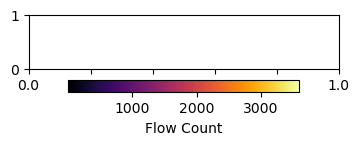

In [124]:
map_ = flows.plot_flows_dataframe(graph_df, c_grid.geodataframe(), map_)
map_

flujos de mibici generados

In [125]:
flows_mibici = np.load('data_mibici_2018_4/flows.npy')
flows_mibici.shape

(320, 10, 10)

In [126]:
np.set_printoptions(precision=2, suppress=True)
print(flows_mibici[0])
print(flows_mibici[1].sum(axis=0))

[[0.24 0.11 0.   0.14 0.   0.01 0.   0.01 0.   0.  ]
 [0.08 0.39 0.   0.09 0.02 0.   0.02 0.   0.   0.  ]
 [0.   0.   0.9  0.   0.   0.01 0.   0.01 0.   0.  ]
 [0.48 0.06 0.   0.5  0.03 0.   0.   0.   0.   0.  ]
 [0.2  0.33 0.   0.23 0.58 0.21 0.38 0.11 0.   0.04]
 [0.   0.11 0.1  0.04 0.31 0.72 0.27 0.48 0.   0.  ]
 [0.   0.   0.   0.   0.05 0.01 0.14 0.09 0.   0.04]
 [0.   0.   0.   0.   0.02 0.04 0.17 0.29 0.   0.08]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.5  0.12]
 [0.   0.   0.   0.   0.   0.   0.03 0.02 0.5  0.73]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [134]:
nodes_mibici = np.load('data_mibici_2018_4/nodes.npy')
for i in range(0, 10):
    print(f'Node {i}', nodes_mibici[0][i])

Node 0 [0 0]
Node 1 [0 1]
Node 2 [0 3]
Node 3 [1 0]
Node 4 [1 1]
Node 5 [1 2]
Node 6 [2 1]
Node 7 [2 2]
Node 8 [3 0]
Node 9 [3 1]


Prueba con datos reales

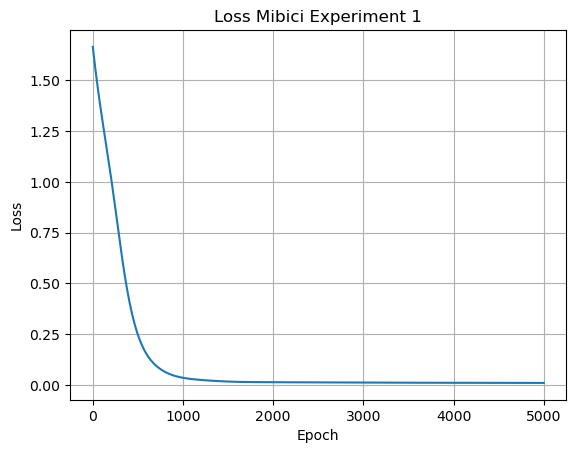

In [130]:
loss_mibici = np.load('results_mibici_experiment_1/loss.npy')
plt.plot(loss_mibici)
plt.title('Loss Mibici Experiment 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

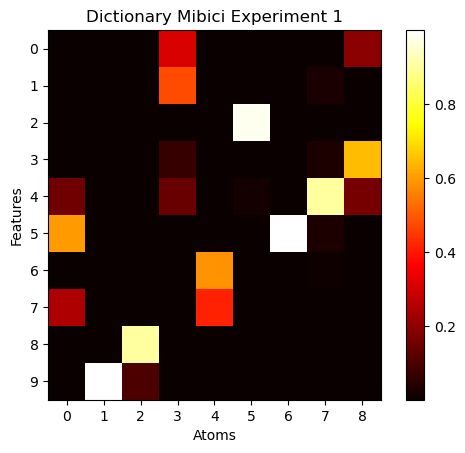

[[0.     0.     0.     0.3119 0.     0.     0.     0.     0.192 ]
 [0.     0.     0.     0.4791 0.     0.     0.     0.0264 0.    ]
 [0.     0.     0.     0.     0.     0.9823 0.0002 0.     0.    ]
 [0.     0.     0.     0.0673 0.     0.     0.     0.0293 0.646 ]
 [0.156  0.     0.     0.1416 0.     0.0173 0.0001 0.9047 0.162 ]
 [0.5942 0.     0.     0.     0.     0.0004 0.9994 0.0283 0.    ]
 [0.     0.0002 0.     0.     0.5831 0.     0.0003 0.0114 0.    ]
 [0.2498 0.     0.     0.     0.4161 0.     0.     0.     0.    ]
 [0.     0.     0.9022 0.     0.     0.     0.     0.     0.    ]
 [0.     0.9998 0.0978 0.     0.0008 0.     0.     0.     0.    ]]


In [135]:
dictionary_mibici = np.load('results_mibici_experiment_1/dictionary.npy')
plt.imshow(dictionary_mibici, cmap='hot', interpolation='nearest')
plt.title('Dictionary Mibici Experiment 1')
plt.xlabel('Atoms')
plt.ylabel('Features')
plt.xticks(np.arange(0, dictionary_mibici.shape[1], 1))
plt.yticks(np.arange(0, dictionary_mibici.shape[0], 1))
plt.colorbar()
plt.show()

np.set_printoptions(precision=4, suppress=True)
print(dictionary_mibici)

In [136]:
weights_mibici = np.load('results_mibici_experiment_1/weights.npy')
weights_mibici.shape

(320, 9, 10)

Flow index: 32


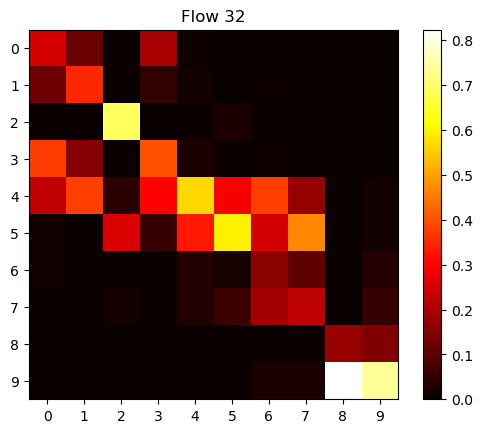

[[0.25   0.1212 0.     0.1938 0.0074 0.0016 0.     0.0013 0.     0.    ]
 [0.125  0.3485 0.0023 0.05   0.0099 0.0008 0.0065 0.0013 0.     0.    ]
 [0.     0.     0.6886 0.     0.0043 0.0238 0.     0.004  0.     0.    ]
 [0.375  0.1515 0.     0.4    0.0207 0.0057 0.0065 0.0013 0.     0.    ]
 [0.225  0.3788 0.0386 0.3    0.5686 0.29   0.3774 0.1727 0.     0.0114]
 [0.0125 0.     0.2545 0.0563 0.3306 0.5981 0.2452 0.4696 0.     0.0114]
 [0.0125 0.     0.     0.     0.0296 0.0177 0.1581 0.1039 0.     0.0341]
 [0.     0.     0.0159 0.     0.029  0.0622 0.1871 0.2213 0.     0.0568]
 [0.     0.     0.     0.     0.     0.     0.     0.004  0.1765 0.1477]
 [0.     0.     0.     0.     0.     0.     0.0194 0.0202 0.8235 0.7386]]


In [139]:
index1 = np.random.randint(0, flows_mibici.shape[0])
print('Flow index:', index1)
plt.imshow(flows_mibici[index1], cmap='hot', interpolation='nearest')
plt.title(f'Flow {index1}')
plt.xticks(np.arange(0, flows_mibici[index1].shape[1], 1))
plt.yticks(np.arange(0, flows_mibici[index1].shape[0], 1))
plt.colorbar()
plt.show()

np.set_printoptions(precision=4, suppress=True)
print(flows_mibici[index1])

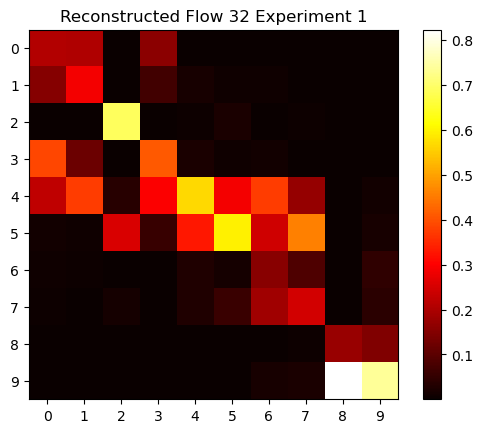

[[0.206  0.204  0.0005 0.1601 0.0013 0.     0.0001 0.0008 0.     0.0001]
 [0.1525 0.2889 0.0012 0.0708 0.0167 0.0075 0.0096 0.0024 0.     0.0003]
 [0.0004 0.     0.6884 0.0001 0.0035 0.0223 0.0003 0.0053 0.     0.0001]
 [0.3887 0.1195 0.0007 0.4103 0.0215 0.0084 0.0108 0.0028 0.     0.0003]
 [0.2241 0.3753 0.0383 0.299  0.5677 0.2881 0.3755 0.1729 0.     0.0105]
 [0.0128 0.0086 0.2543 0.0563 0.3299 0.5966 0.2435 0.4578 0.     0.018 ]
 [0.0089 0.0035 0.0004 0.0023 0.0288 0.016  0.1563 0.0848 0.0001 0.0455]
 [0.0057 0.     0.0157 0.001  0.0285 0.0609 0.1858 0.2472 0.     0.0398]
 [0.0004 0.0001 0.0003 0.0001 0.0009 0.0001 0.0003 0.0053 0.1763 0.1473]
 [0.0004 0.0001 0.0003 0.0001 0.0011 0.0001 0.0177 0.0207 0.8234 0.7382]]


In [140]:
f_mibici_reconstructed_1 = dictionary_mibici @ weights_mibici[index1]
plt.imshow(f_mibici_reconstructed_1, cmap='hot', interpolation='nearest')
plt.title(f'Reconstructed Flow {index1} Experiment 1')
plt.xticks(np.arange(0, f_mibici_reconstructed_1.shape[1], 1))
plt.yticks(np.arange(0, f_mibici_reconstructed_1.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(f_mibici_reconstructed_1)

Experimento con 10 átomos sin regularización espacial

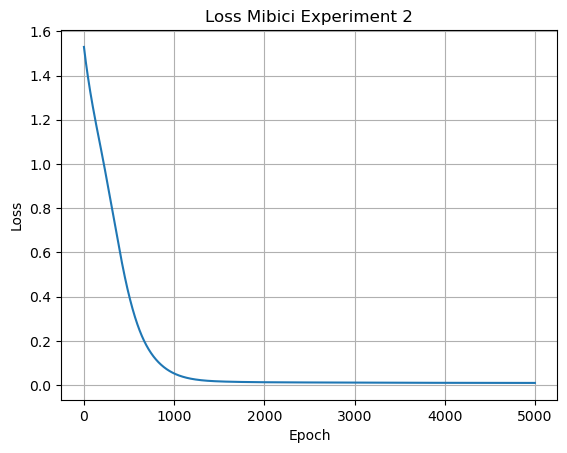

In [141]:
loss_mibici_2 = np.load('results_mibici_experiment_2/loss.npy')
plt.plot(loss_mibici_2)
plt.title('Loss Mibici Experiment 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [146]:
learned_dictionary_mibici_2 = np.load('results_mibici_experiment_2/dictionary.npy')
weights_mibici_2 = np.load('results_mibici_experiment_2/weights.npy')

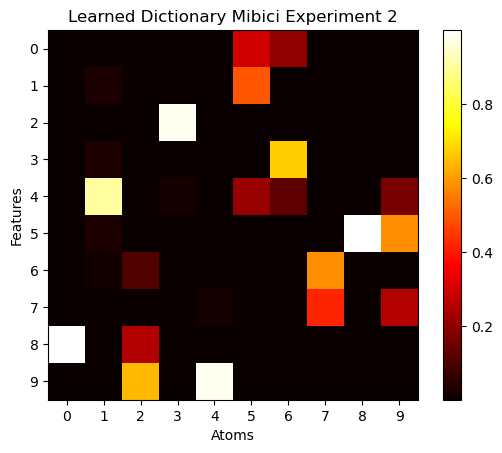

[[0.     0.     0.     0.     0.     0.2956 0.2014 0.     0.     0.    ]
 [0.     0.0261 0.     0.     0.     0.4923 0.     0.     0.     0.    ]
 [0.     0.     0.     0.9819 0.     0.     0.     0.     0.     0.    ]
 [0.     0.028  0.     0.     0.     0.0008 0.6712 0.     0.     0.    ]
 [0.     0.9045 0.     0.0181 0.     0.2114 0.1274 0.     0.     0.1678]
 [0.     0.0294 0.     0.     0.     0.     0.     0.001  1.     0.5758]
 [0.     0.012  0.1062 0.     0.     0.     0.     0.5776 0.     0.    ]
 [0.     0.     0.     0.     0.0166 0.     0.     0.4214 0.     0.2563]
 [1.     0.     0.2519 0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.6419 0.     0.9834 0.     0.     0.     0.     0.    ]]


In [145]:
plt.imshow(learned_dictionary_mibici_2, cmap='hot', interpolation='nearest')
plt.title('Learned Dictionary Mibici Experiment 2')
plt.xlabel('Atoms')
plt.ylabel('Features')
plt.xticks(np.arange(0, learned_dictionary_mibici_2.shape[1], 1))
plt.yticks(np.arange(0, learned_dictionary_mibici_2.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(learned_dictionary_mibici_2)

Flow index: 19


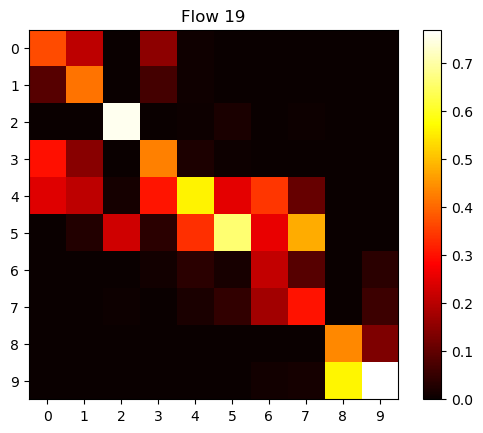

[[0.3684 0.2059 0.     0.1524 0.0087 0.0009 0.     0.     0.     0.    ]
 [0.0877 0.4118 0.     0.0667 0.0081 0.0016 0.     0.     0.     0.    ]
 [0.     0.     0.7552 0.     0.0041 0.0206 0.     0.0057 0.     0.    ]
 [0.2982 0.1471 0.     0.4286 0.0237 0.004  0.     0.0029 0.     0.    ]
 [0.2456 0.2059 0.0138 0.3048 0.5617 0.2516 0.3443 0.1063 0.     0.    ]
 [0.     0.0294 0.2276 0.0381 0.3358 0.659  0.2568 0.4799 0.     0.    ]
 [0.     0.     0.     0.0095 0.0376 0.0168 0.2131 0.0891 0.     0.0385]
 [0.     0.     0.0034 0.     0.0203 0.0455 0.1749 0.3017 0.     0.0577]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.4375 0.1346]
 [0.     0.     0.     0.     0.     0.     0.0109 0.0144 0.5625 0.7692]]


In [143]:
index2 = np.random.randint(0, flows_mibici.shape[0])
print('Flow index:', index2)
plt.imshow(flows_mibici[index2], cmap='hot', interpolation='nearest')
plt.title(f'Flow {index2}')
plt.xticks(np.arange(0, flows_mibici[index2].shape[1], 1))  
plt.yticks(np.arange(0, flows_mibici[index2].shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(flows_mibici[index2])

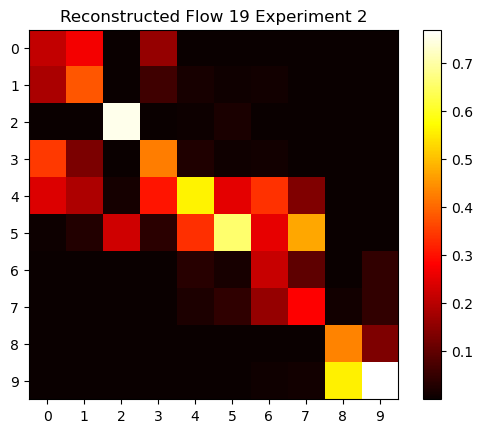

[[0.213  0.2684 0.0001 0.1606 0.0023 0.0001 0.0001 0.     0.     0.    ]
 [0.1855 0.3816 0.0001 0.063  0.0163 0.0066 0.0098 0.     0.     0.    ]
 [0.0017 0.0001 0.7548 0.0002 0.0031 0.0191 0.0001 0.0001 0.     0.    ]
 [0.3478 0.1315 0.0001 0.4271 0.0247 0.0071 0.0104 0.     0.     0.0001]
 [0.2429 0.1887 0.015  0.3059 0.5607 0.2499 0.3396 0.1376 0.     0.0001]
 [0.0037 0.0294 0.2273 0.0389 0.3351 0.6575 0.2531 0.4731 0.     0.0001]
 [0.0018 0.0001 0.0005 0.0029 0.0355 0.0152 0.2173 0.0973 0.0001 0.0471]
 [0.0005 0.0001 0.0018 0.0009 0.0215 0.0442 0.1603 0.2812 0.0094 0.0473]
 [0.0016 0.     0.0002 0.0003 0.0004 0.0002 0.0012 0.     0.4328 0.1352]
 [0.0015 0.0001 0.0002 0.0002 0.0005 0.0002 0.0081 0.0108 0.5576 0.77  ]]


In [147]:
f_mibici_reconstructed_2 = learned_dictionary_mibici_2 @ weights_mibici_2[index2]
plt.imshow(f_mibici_reconstructed_2, cmap='hot', interpolation='nearest')
plt.title(f'Reconstructed Flow {index2} Experiment 2')
plt.xticks(np.arange(0, f_mibici_reconstructed_2.shape[1], 1)) 
plt.yticks(np.arange(0, f_mibici_reconstructed_2.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(f_mibici_reconstructed_2)

Experimento con 10 átomos y con regularización espacial

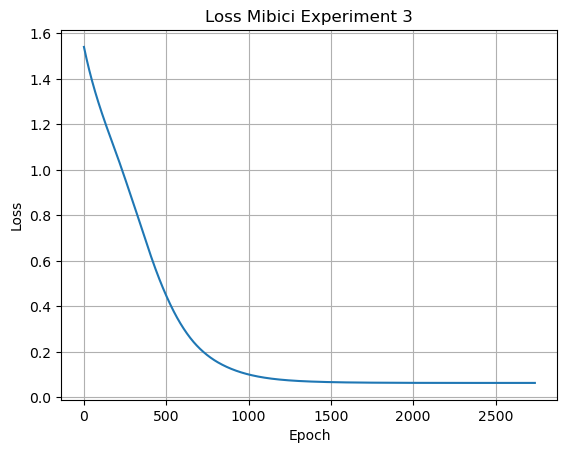

In [148]:
loss_mibici_3 = np.load('results_mibici_experiment_3/loss.npy')
plt.plot(loss_mibici_3)
plt.title('Loss Mibici Experiment 3')
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.grid()
plt.show()

In [149]:
learned_dictionary_mibici_3 = np.load('results_mibici_experiment_3/dictionary.npy')
weights_mibici_3 = np.load('results_mibici_experiment_3/weights.npy')

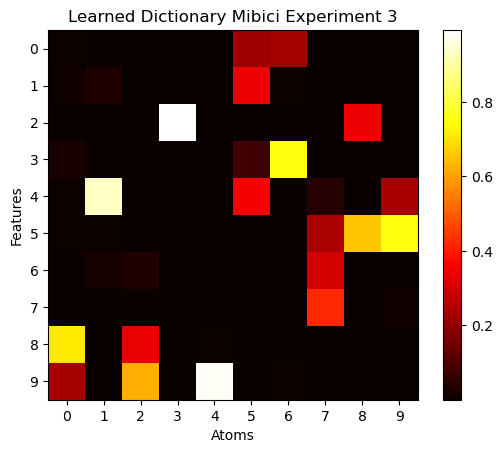

[[0.0061 0.0025 0.0016 0.001  0.001  0.2195 0.2305 0.0001 0.0003 0.    ]
 [0.0089 0.0348 0.0012 0.0008 0.0012 0.3373 0.0057 0.0001 0.0004 0.0002]
 [0.003  0.0001 0.0009 0.9926 0.0006 0.0008 0.0003 0.0003 0.3406 0.0005]
 [0.0264 0.0017 0.0013 0.0022 0.0009 0.0846 0.7549 0.0006 0.0006 0.0004]
 [0.006  0.9311 0.0025 0.0018 0.0018 0.3498 0.0004 0.0393 0.0008 0.2355]
 [0.0068 0.0049 0.0017 0.0005 0.0006 0.0025 0.0005 0.2376 0.6563 0.7533]
 [0.0017 0.0216 0.0338 0.0001 0.0032 0.0036 0.001  0.2987 0.0001 0.0014]
 [0.0026 0.0006 0.0027 0.0003 0.0034 0.0009 0.0002 0.4221 0.0004 0.0081]
 [0.7084 0.0008 0.3322 0.0003 0.0056 0.0003 0.0026 0.0005 0.0003 0.0003]
 [0.2303 0.002  0.6222 0.0002 0.9818 0.0008 0.0041 0.0008 0.0003 0.0002]]


In [150]:
plt.imshow(learned_dictionary_mibici_3, cmap='hot', interpolation='nearest')
plt.title('Learned Dictionary Mibici Experiment 3')
plt.xlabel('Atoms')
plt.ylabel('Features')
plt.xticks(np.arange(0, learned_dictionary_mibici_3.shape[1], 1))
plt.yticks(np.arange(0, learned_dictionary_mibici_3.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(learned_dictionary_mibici_3)

Flow index: 19


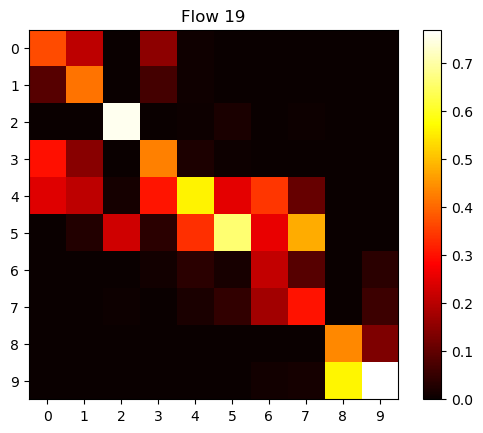

[[0.3684 0.2059 0.     0.1524 0.0087 0.0009 0.     0.     0.     0.    ]
 [0.0877 0.4118 0.     0.0667 0.0081 0.0016 0.     0.     0.     0.    ]
 [0.     0.     0.7552 0.     0.0041 0.0206 0.     0.0057 0.     0.    ]
 [0.2982 0.1471 0.     0.4286 0.0237 0.004  0.     0.0029 0.     0.    ]
 [0.2456 0.2059 0.0138 0.3048 0.5617 0.2516 0.3443 0.1063 0.     0.    ]
 [0.     0.0294 0.2276 0.0381 0.3358 0.659  0.2568 0.4799 0.     0.    ]
 [0.     0.     0.     0.0095 0.0376 0.0168 0.2131 0.0891 0.     0.0385]
 [0.     0.     0.0034 0.     0.0203 0.0455 0.1749 0.3017 0.     0.0577]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.4375 0.1346]
 [0.     0.     0.     0.     0.     0.     0.0109 0.0144 0.5625 0.7692]]


In [153]:
#index3 = np.random.randint(0, flows_mibici.shape[0])
print('Flow index:', index2)
plt.imshow(flows_mibici[index2], cmap='hot', interpolation='nearest')
plt.title(f'Flow {index2}')
plt.xticks(np.arange(0, flows_mibici[index2].shape[1], 1))
plt.yticks(np.arange(0, flows_mibici[index2].shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(flows_mibici[index2])

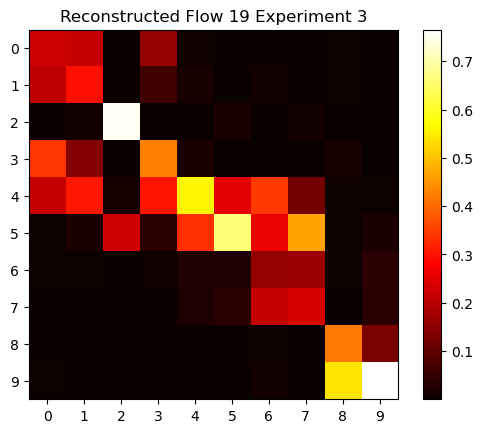

[[0.2213 0.2139 0.0009 0.1586 0.0078 0.0011 0.001  0.0001 0.0039 0.0012]
 [0.2056 0.297  0.0009 0.0613 0.0175 0.0029 0.0108 0.0002 0.0056 0.0011]
 [0.0024 0.0106 0.7543 0.0007 0.0024 0.0195 0.0007 0.0101 0.002  0.0008]
 [0.3426 0.1431 0.0018 0.4254 0.0223 0.0024 0.0012 0.0006 0.0153 0.0012]
 [0.2141 0.3076 0.0129 0.3039 0.5603 0.2506 0.3446 0.1205 0.0042 0.0051]
 [0.004  0.0211 0.2268 0.037  0.3346 0.6584 0.2558 0.4654 0.0042 0.0201]
 [0.0032 0.0035 0.0004 0.0069 0.0269 0.025  0.1573 0.165  0.0036 0.0385]
 [0.0014 0.0011 0.0008 0.0011 0.0258 0.0384 0.2139 0.2359 0.0029 0.0366]
 [0.002  0.0006 0.0006 0.0019 0.0009 0.0008 0.0042 0.0006 0.4156 0.1302]
 [0.0033 0.0015 0.0007 0.0031 0.0015 0.0009 0.0106 0.0017 0.5427 0.7653]]


In [154]:
f_mibici_reconstructed_3 = learned_dictionary_mibici_3 @ weights_mibici_3[index2]
plt.imshow(f_mibici_reconstructed_3, cmap='hot', interpolation='nearest')
plt.title(f'Reconstructed Flow {index2} Experiment 3')
plt.xticks(np.arange(0, f_mibici_reconstructed_3.shape[1], 1))
plt.yticks(np.arange(0, f_mibici_reconstructed_3.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(f_mibici_reconstructed_3)

In [183]:
weights_example1 = weights_mibici_2[index2]
weights_example2 = weights_mibici_3[index2]

In [184]:
print('Weights Example 1:\n', weights_example1, '\nSum of Weights:', weights_example1.sum(axis=0))
print(weights_example1.shape)
print('Weights Example 2:\n', weights_example2, '\nSum of Weights:', weights_example2.sum(axis=0))
print(weights_example2.shape)

Weights Example 1:
 [[0.0013 0.     0.0001 0.0003 0.0003 0.0001 0.0001 0.     0.4327 0.1351]
 [0.1095 0.     0.0002 0.2222 0.6174 0.2502 0.3716 0.     0.     0.    ]
 [0.0009 0.     0.0001 0.0001 0.0005 0.0001 0.0045 0.     0.0006 0.0007]
 [0.0017 0.0001 0.7687 0.0002 0.0031 0.0194 0.0001 0.     0.     0.    ]
 [0.0009 0.0001 0.0001 0.0001 0.0002 0.0001 0.0054 0.0109 0.5666 0.7826]
 [0.371  0.7752 0.0001 0.1161 0.0003 0.0001 0.0001 0.     0.     0.    ]
 [0.5132 0.1951 0.0001 0.627  0.0111 0.0001 0.0001 0.     0.     0.0001]
 [0.0007 0.0001 0.0009 0.0004 0.0485 0.0211 0.3676 0.1684 0.     0.0814]
 [0.0001 0.0294 0.2241 0.0306 0.3145 0.5707 0.2299 0.0009 0.     0.    ]
 [0.0005 0.     0.0055 0.003  0.0041 0.1379 0.0207 0.8197 0.     0.    ]] 
Sum of Weights: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(10, 10)
Weights Example 2:
 [[0.0008 0.0001 0.0002 0.0003 0.0002 0.0004 0.0001 0.0002 0.5651 0.0007]
 [0.0029 0.     0.0051 0.2598 0.4922 0.0627 0.3036 0.     0.     0.0001]
 [0.0009 0.0001 0.0003 0.

In [199]:
def visualizar_dos_matrices_pesos_2d(alpha1, alpha2, labels=["Sin suavidad", "Con suavidad"]):
    """
    Visualiza en 2D las columnas de dos matrices de pesos (alpha1 y alpha2) usando PCA.
    Usa círculos para la primera matriz y 'x' para la segunda.
    El color representa el nodo (columna), compartido entre ambas matrices.
    """
    if alpha1.shape != alpha2.shape:
        raise ValueError("Las dos matrices deben tener la misma forma.")

    k, n = alpha1.shape

    # Transponer para obtener vectores columna por nodo
    vector_sets = [alpha1.T, alpha2.T]  # cada uno de forma (n, k)
    all_vectors = np.vstack(vector_sets)  # (2n, k)

    # PCA
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(all_vectors)
    print('Variabilidad explicada por PCA:', pca.explained_variance_ratio_.sum())

    colors = plt.cm.get_cmap('tab10', n)

    fig, ax = plt.subplots(figsize=(8, 6))

    for i in range(n):
        p1 = reduced[i]
        p2 = reduced[i + n]
        color = colors(i)

        ax.scatter(p1[0], p1[1], color=color, marker='o', s=60, alpha=0.7)
        ax.scatter(p2[0], p2[1], color=color, marker='x', s=60, alpha=0.7)

    # Leyenda personalizada
    legend_marcadores = [
        Line2D([0], [0], marker='o', color='w', label=labels[0], markerfacecolor='gray', markersize=8),
        Line2D([0], [0], marker='x', color='w', label=labels[1], markeredgecolor='gray', markersize=8)
    ]
    legend_nodos = [
        Line2D([0], [0], marker='o', color='w', label=f'Nodo {i+1}',
               markerfacecolor=colors(i), markersize=8) for i in range(n)
    ]

    first_legend = ax.legend(handles=legend_marcadores, title="Tipo de matriz", loc='lower right')
    ax.add_artist(first_legend)  # Añadir la primera leyenda sin que se sobrescriba
    ax.legend(handles=legend_nodos, title="Color por nodo", loc='upper right', ncol=1)

    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_title('PCA 2D de vectores columna (dos matrices)')
    plt.tight_layout()
    plt.grid()
    plt.show()


Variabilidad explicada por PCA: 0.5111935


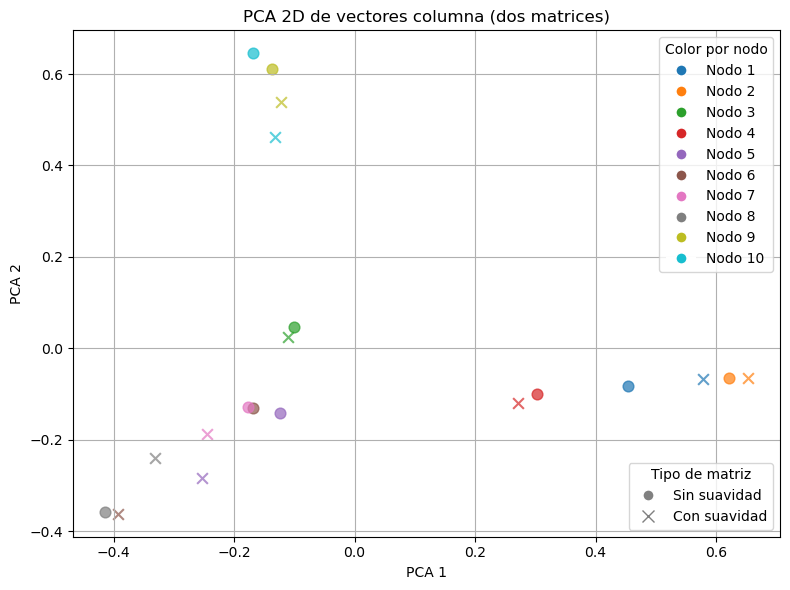

In [200]:
visualizar_dos_matrices_pesos_2d(weights_example1, weights_example2)